# A reconstruction nosie dependence on CMB white noise level
This code compute normalization and power spectrum of quadratic estiamtors with varying CMB noise level

In [1]:
# external
import numpy as np
from matplotlib.pyplot import *
# from cmblensplus/wrap/
import basic
import curvedsky as cs
# from cmblensplus/utils/
import plottools as plc

First define parameters

In [9]:
Tcmb  = 2.726e6    # CMB temperature
Lmin, Lmax  = 2, 2048       # maximum multipole of output normalization
rlmin, rlmax = 100, 4096  # CMB multipole range for reconstruction
L = np.linspace(0,Lmax,Lmax+1)
Lfac = (L*(L+1.))**2/(2*np.pi)
ac2rad = np.pi/10800.
lTmax = 3000
quad = ['TT','TE','EE','TB','EB','MV']
QDO = [True,True,True,True,True,False] # this means that TT, TE, EE, TB and EB are used for MV estimator

Load arrays of CMB unlensed and lensed Cls. Unlensed Cls are not used for now. The Cls should not be multiplied by any factors and should not have units.  

In [3]:
# ucl is an array of shape [0:5,0:rlmax+1] and ucl[0,:] = TT, ucl[1,:] = EE, ucl[2,:] = TE, lcl[3,:] = phiphi, lcl[4,:] = Tphi
ucl = basic.aps.read_cambcls('../data/unlensedcls.dat',2,rlmax,5)/Tcmb**2 # TT, EE, TE, pp, Tp
# lcl is an array of shape [0:4,0:rlmax+1] and lcl[0,:] = TT, lcl[1,:] = EE, lcl[2,:] = BB, and lcl[3,:] = TE
lcl = basic.aps.read_cambcls('../data/lensedcls.dat',2,rlmax,4,bb=True)/Tcmb**2 # TT, EE, BB, TE

Loop over SNR calculation

In [4]:
sigs = [3,4,5,8,10,20,30,50]
snr = np.zeros((6,len(sigs)))
for i, sig in enumerate(sigs):
    nl  = np.zeros((4,rlmax+1))
    nl[0,:] = (sig*ac2rad/Tcmb)**2
    nl[1,:] = 2*nl[0,:]
    nl[2,:] = 2*nl[0,:]
    nl[0,lTmax+1:] = 1e30
    ocl = lcl + nl
    Ag, Ac, Wg, Wc = cs.norm_lens.qall(QDO,Lmax,rlmin,rlmax,lcl,ocl)
    for qi in range(6):
        var_lm = ( ucl[3,Lmin:Lmax+1] + Ag[qi,Lmin:Lmax+1] ) 
        snr[qi,i] = np.sqrt( np.sum( (L[Lmin:Lmax+1]+.5) * ucl[3,Lmin:Lmax+1]**2/var_lm**2 ) )
    print(snr[:,i])

372.4718868392984
323.7469118609253
290.63626187574613
234.7979226237979
213.55298266275904
155.009635633679
121.14146095771893
81.51589162301254


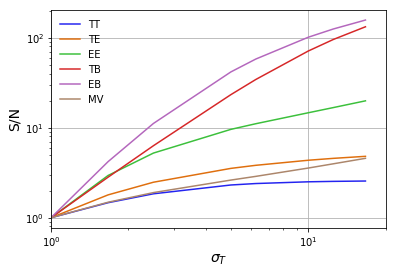

In [27]:
pl.plot_1dstyle(xmin=1,xmax=20,xlab=r'$\sigma_T$',ylab='S/N',xlog=True,ylog=True,grid=True)
x = 50./np.array(sigs)
for qi, q in enumerate(quad):
    plot(x,snr[qi,:]/snr[qi,-1],label=q)
legend()